<a href="https://colab.research.google.com/github/kishorekumar-it19/DSC-WOW---PROZONE/blob/main/World_wide_crop_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/worldwide_crop_consumption.csv')
df.head(5)

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,5.374114
1,AUS,RICE,TONNE_HA,1991,5.897753
2,AUS,RICE,TONNE_HA,1992,5.903150
3,AUS,RICE,TONNE_HA,1993,5.221311
4,AUS,RICE,TONNE_HA,1994,5.457576


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  21165 non-null  object 
 1   SUBJECT   21165 non-null  object 
 2   MEASURE   21165 non-null  object 
 3   TIME      21165 non-null  int64  
 4   Value     21165 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 826.9+ KB


In [ ]:
df.describe()

,TIME,Value
count,21165.000000,2.116500e+04
mean,2008.114387,1.274159e+04
std,10.624953,6.069582e+04
min,1990.000000,0.000000e+00
25%,1999.000000,1.980784e+00
50%,2008.000000,2.400000e+01
75%,2017.000000,1.580247e+03
max,2026.000000,1.163711e+06


In [ ]:
df.nunique()

LOCATION       48
SUBJECT         4
MEASURE         3
TIME           37
Value       16264
dtype: int64

In [ ]:
df.skew()

TIME    -0.006001
Value    9.428352
dtype: float64

In [ ]:
df = pd.get_dummies(df,columns=['MEASURE'])
df

,LOCATION,SUBJECT,TIME,Value,MEASURE_THND_HA,MEASURE_THND_TONNE,MEASURE_TONNE_HA
0,AUS,RICE,1990,5.374114,0,0,1
1,AUS,RICE,1991,5.897753,0,0,1
2,AUS,RICE,1992,5.903150,0,0,1
3,AUS,RICE,1993,5.221311,0,0,1
4,AUS,RICE,1994,5.457576,0,0,1
...,...,...,...,...,...,...,...
21160,EU28,SOYBEAN,2022,2.897405,0,0,1
21161,EU28,SOYBEAN,2023,2.903548,0,0,1
21162,EU28,SOYBEAN,2024,2.915203,0,0,1
21163,EU28,SOYBEAN,2025,2.919959,0,0,1


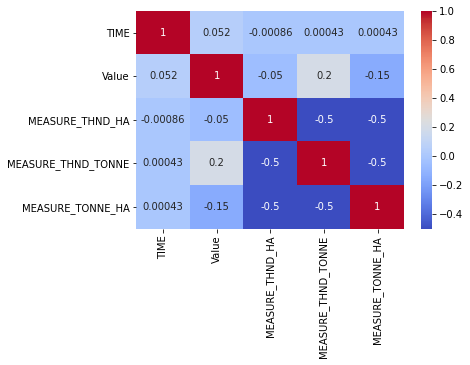

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



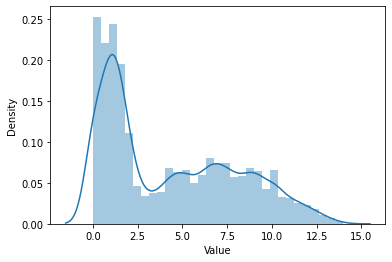

In [ ]:
sns.distplot(np.log1p(df['Value']))
plt.show()

In [ ]:
by_c = df.groupby('LOCATION')[['Value']].sum().reset_index().sort_values('Value',ascending=False)

In [ ]:
px.bar(by_c,by_c['LOCATION'],by_c['Value'])

In [ ]:
px.bar(by_c[:10],by_c[:10]['LOCATION'],by_c[:10]['Value'],labels={'x':'Country','y':'Value'})

In [ ]:
by_t = df.groupby(['TIME'])[['Value']].sum().reset_index().sort_values('Value',ascending=False)

In [ ]:
px.bar(by_t,by_t['TIME'],by_t['Value'])

In [ ]:
by_s = df.groupby('SUBJECT')[['Value']].sum().reset_index().sort_values('Value',ascending=False)

In [ ]:
px.bar(by_s,by_s['SUBJECT'],by_s['Value'])

In [ ]:
china_rice = df[(df['LOCATION'] == 'CHN') & (df['SUBJECT'] == 'RICE')]

In [ ]:
px.bar(china_rice,china_rice['TIME'],china_rice['Value'])

In [ ]:
china_not_rice = df[(df['LOCATION'] == 'CHN') & (df['SUBJECT'] != 'RICE')]

In [ ]:
px.bar(china_rice,china_rice['TIME'],china_rice['Value'])